In [1]:
#Author: Abhishek N. Singh
#Description: This script evaluates the IC50 value for a drug when acting against cell viability such 
#as cancer cells, and then I try to fit a regression model for Ccle data
#Date: 26th December 2020

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import seaborn as sns





In [27]:
dataset = pd.read_csv("ccle_Erlotinib_ic50.csv", delimiter=",")

In [28]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,exp_SLC4A1,exp_FAM214B,exp_CD79B,exp_MYLIP,exp_MED24,exp_CSDE1,exp_BAZ1B,exp_ABHD5,exp_MAP4K3,exp_ELOVL5,exp_POLR3B,exp_NPC1L1,exp_XYLT2,exp_RALBP1,exp_SAMD4A,exp_VIM,exp_AGPAT4,exp_PNPLA6,exp_TUBG2,exp_PARP3,exp_BARX2,exp_WDR37,exp_ARHGAP6,exp_LMO3,exp_DKK3,exp_NFE2L3,exp_NRIP2,exp_KCNQ1,exp_ARSF,exp_CALCRL,exp_ANKRD44,exp_SPEN,exp_CYB5R4,exp_PRKCQ,exp_CDK13,exp_METTL22,exp_ROCK1,exp_DNAJA2,...,exp_ATAD5,exp_ECM1,exp_AC079305.10,exp_MFGE8,exp_FERMT2,exp_CAMKV,exp_OR51E2,exp_SHISA6,exp_MTMR7,exp_PEAK1,exp_KRT33B,exp_GABRP,exp_SYT13,exp_UBQLN2,exp_FZD8,exp_RP11-422J8.1,exp_TRIP12,exp_DMRT1,exp_SLC4A11,exp_FGF23,exp_METTL25,exp_CDC73,exp_CD3EAP,exp_NCBP1,exp_WNT3,exp_RGS7BP,exp_AP000679.2,exp_CMTM5,exp_DAP3,exp_RAPH1,exp_CYB5B,exp_RHOV,exp_C17orf89,exp_PUF60,exp_C13orf45,exp_ZNF442,exp_RP11-403N16.3,exp_GTF2E1,exp_ZNF362,Erlotinib
0,0,22RV1,4.082593,6.298913,3.851031,7.107385,8.436494,11.343345,7.483741,7.551904,8.332643,11.792308,9.344713,4.248098,4.366640,7.451602,4.663437,7.258833,3.957589,7.600397,6.908966,4.725975,NaN,6.211135,5.629812,4.958598,3.485505,4.476219,4.079834,NaN,4.958131,3.983449,4.432377,8.632950,5.094334,4.029845,7.701648,7.631633,NaN,9.981774,...,7.400583,4.981640,4.868796,NaN,8.584477,4.564852,4.174741,3.616413,3.510075,6.203490,4.443861,3.683258,4.143058,9.286393,6.062309,4.177499,9.914280,3.975643,6.627792,NaN,8.444246,9.201161,7.226234,7.368465,4.398275,3.338287,4.668934,4.596752,10.617282,6.767572,10.054453,4.593774,5.424791,10.172457,3.560752,3.714123,3.751627,9.030491,8.706857,-6.370221
1,1,23132-87,4.128230,6.476800,3.649039,7.695474,NaN,10.441450,7.775860,NaN,8.897495,7.280994,9.235046,4.029988,4.606524,7.746412,4.777889,5.053373,4.928611,6.771384,NaN,5.982616,4.238520,6.693463,3.520891,4.414752,3.620253,4.059379,4.066404,5.788688,4.925361,4.072047,3.700446,8.786443,5.734335,4.144037,6.954582,7.508120,4.446643,9.794442,...,6.867038,8.489555,5.962027,4.355453,4.029825,4.392756,4.130343,NaN,3.459368,6.627770,4.228168,3.824430,4.057312,8.490557,4.263747,6.175023,10.459879,NaN,6.425510,3.702439,8.399821,8.850130,NaN,7.855743,4.582457,3.222617,4.623805,4.454426,11.317319,8.149260,11.047558,4.836936,5.226575,11.311974,3.958961,NaN,3.816234,NaN,7.600376,-1.162793
2,2,5637,4.232633,5.409350,3.884663,5.997920,8.764779,11.155580,7.256661,7.720493,NaN,9.829221,8.406003,3.931312,4.951526,NaN,4.376442,13.615661,6.159889,8.130779,7.121475,5.203785,5.436578,5.574527,3.864687,4.232630,7.263396,8.851568,3.755380,NaN,5.182808,3.998052,3.903182,8.404504,5.257813,6.221232,6.727735,8.857687,5.802521,9.523043,...,7.233137,5.714424,5.590182,4.976245,7.901070,4.308740,4.056972,3.671009,3.577847,7.010037,4.920441,3.847691,3.999551,9.010487,4.626338,5.975799,9.878371,3.882246,5.764312,4.142796,8.249753,7.617302,7.378636,NaN,5.155399,3.547933,NaN,NaN,11.469862,7.278961,8.799358,5.142446,6.427744,10.865098,3.803288,3.575255,3.737100,8.258913,NaN,-0.329292
3,3,639-V,4.274809,5.511578,3.822042,6.873338,8.765674,11.395225,8.001514,8.359996,8.441087,11.008791,8.806536,3.950303,5.199439,8.373395,5.403594,13.222709,4.974602,9.007124,7.337783,6.168544,NaN,6.411914,3.869755,3.858503,5.463546,5.144393,3.682765,4.861025,NaN,3.710644,4.179881,8.363210,5.683454,7.095368,7.322369,8.454900,5.933833,9.954870,...,8.606337,5.370465,NaN,4.470538,10.056486,5.149470,4.144588,3.741141,NaN,7.364387,4.723452,3.771738,4.581364,9.269365,4.168433,4.561451,10.685752,3.771484,7.950414,4.496515,7.121637,7.924980,7.473654,8.310546,NaN,3.545479,NaN,4.632940,10.866240,6.724361,9.461169,4.427737,NaN,11.230596,4.301963,NaN,3.833572,8.968382,8.986759,-1.011109
4,4,647-V,4.138209,5.590375,3.775710,7.198329,7.990521,11.860634,7.673516,7.262398,NaN,11.156613,9.096359,3.890482,4.754753,8.025617,4.728453,5.072331,3.948612,8.237300,6.774186,6.215790,4.219273,NaN,3.924146,4.054676,5.758870,7.018634,3.985200,5.041176,4.933259,4.206833,3.763124,7.932391,5.462681,4.215227,7.903790,NaN,4.860129,9.945075,...,6.963498,8.764630,NaN,5.154277,7.929167,

In [29]:
dataset.shape

(1061, 1753)

In [7]:
#So 1061 samples with 1753 features

In [8]:
#The first two column feature variables are not needed for data modeling and can be dropped.

In [30]:
del dataset['Unnamed: 0']
del dataset['Unnamed: 0.1']

In [31]:
dataset.head()

,exp_SLC4A1,exp_FAM214B,exp_CD79B,exp_MYLIP,exp_MED24,exp_CSDE1,exp_BAZ1B,exp_ABHD5,exp_MAP4K3,exp_ELOVL5,exp_POLR3B,exp_NPC1L1,exp_XYLT2,exp_RALBP1,exp_SAMD4A,exp_VIM,exp_AGPAT4,exp_PNPLA6,exp_TUBG2,exp_PARP3,exp_BARX2,exp_WDR37,exp_ARHGAP6,exp_LMO3,exp_DKK3,exp_NFE2L3,exp_NRIP2,exp_KCNQ1,exp_ARSF,exp_CALCRL,exp_ANKRD44,exp_SPEN,exp_CYB5R4,exp_PRKCQ,exp_CDK13,exp_METTL22,exp_ROCK1,exp_DNAJA2,exp_RNF126,exp_MNT,...,exp_ATAD5,exp_ECM1,exp_AC079305.10,exp_MFGE8,exp_FERMT2,exp_CAMKV,exp_OR51E2,exp_SHISA6,exp_MTMR7,exp_PEAK1,exp_KRT33B,exp_GABRP,exp_SYT13,exp_UBQLN2,exp_FZD8,exp_RP11-422J8.1,exp_TRIP12,exp_DMRT1,exp_SLC4A11,exp_FGF23,exp_METTL25,exp_CDC73,exp_CD3EAP,exp_NCBP1,exp_WNT3,exp_RGS7BP,exp_AP000679.2,exp_CMTM5,exp_DAP3,exp_RAPH1,exp_CYB5B,exp_RHOV,exp_C17orf89,exp_PUF60,exp_C13orf45,exp_ZNF442,exp_RP11-403N16.3,exp_GTF2E1,exp_ZNF362,Erlotinib
0,4.082593,6.298913,3.851031,7.107385,8.436494,11.343345,7.483741,7.551904,8.332643,11.792308,9.344713,4.248098,4.366640,7.451602,4.663437,7.258833,3.957589,7.600397,6.908966,4.725975,NaN,6.211135,5.629812,4.958598,3.485505,4.476219,4.079834,NaN,4.958131,3.983449,4.432377,8.632950,5.094334,4.029845,7.701648,7.631633,NaN,9.981774,7.670413,9.671062,...,7.400583,4.981640,4.868796,NaN,8.584477,4.564852,4.174741,3.616413,3.510075,6.203490,4.443861,3.683258,4.143058,9.286393,6.062309,4.177499,9.914280,3.975643,6.627792,NaN,8.444246,9.201161,7.226234,7.368465,4.398275,3.338287,4.668934,4.596752,10.617282,6.767572,10.054453,4.593774,5.424791,10.172457,3.560752,3.714123,3.751627,9.030491,8.706857,-6.370221
1,4.128230,6.476800,3.649039,7.695474,NaN,10.441450,7.775860,NaN,8.897495,7.280994,9.235046,4.029988,4.606524,7.746412,4.777889,5.053373,4.928611,6.771384,NaN,5.982616,4.238520,6.693463,3.520891,4.414752,3.620253,4.059379,4.066404,5.788688,4.925361,4.072047,3.700446,8.786443,5.734335,4.144037,6.954582,7.508120,4.446643,9.794442,NaN,9.492787,...,6.867038,8.489555,5.962027,4.355453,4.029825,4.392756,4.130343,NaN,3.459368,6.627770,4.228168,3.824430,4.057312,8.490557,4.263747,6.175023,10.459879,NaN,6.425510,3.702439,8.399821,8.850130,NaN,7.855743,4.582457,3.222617,4.623805,4.454426,11.317319,8.149260,11.047558,4.836936,5.226575,11.311974,3.958961,NaN,3.816234,NaN,7.600376,-1.162793
2,4.232633,5.409350,3.884663,5.997920,8.764779,11.155580,7.256661,7.720493,NaN,9.829221,8.406003,3.931312,4.951526,NaN,4.376442,13.615661,6.159889,8.130779,7.121475,5.203785,5.436578,5.574527,3.864687,4.232630,7.263396,8.851568,3.755380,NaN,5.182808,3.998052,3.903182,8.404504,5.257813,6.221232,6.727735,8.857687,5.802521,9.523043,8.570222,9.373495,...,7.233137,5.714424,5.590182,4.976245,7.901070,4.308740,4.056972,3.671009,3.577847,7.010037,4.920441,3.847691,3.999551,9.010487,4.626338,5.975799,9.878371,3.882246,5.764312,4.142796,8.249753,7.617302,7.378636,NaN,5.155399,3.547933,NaN,NaN,11.469862,7.278961,8.799358,5.142446,6.427744,10.865098,3.803288,3.575255,3.737100,8.258913,NaN,-0.329292
3,4.274809,5.511578,3.822042,6.873338,8.765674,11.395225,8.001514,8.359996,8.441087,11.008791,8.806536,3.950303,5.199439,8.373395,5.403594,13.222709,4.974602,9.007124,7.337783,6.168544,NaN,6.411914,3.869755,3.858503,5.463546,5.144393,3.682765,4.861025,NaN,3.710644,4.179881,8.363210,5.683454,7.095368,7.322369,8.454900,5.933833,9.954870,8.703355,8.943933,...,8.606337,5.370465,NaN,4.470538,10.056486,5.149470,4.144588,3.741141,NaN,7.364387,4.723452,3.771738,4.581364,9.269365,4.168433,4.561451,10.685752,3.771484,7.950414,4.496515,7.121637,7.924980,7.473654,8.310546,NaN,3.545479,NaN,4.632940,10.866240,6.724361,9.461169,4.427737,NaN,11.230596,4.301963,NaN,3.833572,8.968382,8.986759,-1.011109
4,4.138209,5.590375,3.775710,7.198329,7.990521,11.860634,7.673516,7.262398,NaN,11.156613,9.096359,3.890482,4.754753,8.025617,4.728453,5.072331,3.948612,8.237300,6.774186,6.215790,4.219273,NaN,3.924146,4.054676,5.758870,7.018634,3.985200,5.041176,4.933259,4.206833,3.763124,7.932391,5.462681,4.215227,7.903790,NaN,4.860129,9.945075,7.637739,9.476065,...,6.

In [32]:
y = dataset.Erlotinib

In [33]:
y.head() # This is how our target variable looks like

0   -6.370221
1   -1.162793
2   -0.329292
3   -1.011109
4   -1.162793
Name: Erlotinib, dtype: float64

In [34]:
y.describe() #Lets see how our target variable looks like in terms of its statistics

count    1061.000000
mean       -1.162793
std         0.503345
min        -6.590939
25%        -1.162793
50%        -1.162793
75%        -1.162793
max         1.413438
Name: Erlotinib, dtype: float64

In [35]:
#Lets extract the list of feature variables names to be used as predictors
features = list(dataset.columns.values) #Make a list of all of the columns in the df
features.pop(features.index('Erlotinib'))

'Erlotinib'

In [36]:
features #Here is the list of the feature column variable names 

['exp_SLC4A1',
 'exp_FAM214B',
 'exp_CD79B',
 'exp_MYLIP',
 'exp_MED24',
 'exp_CSDE1',
 'exp_BAZ1B',
 'exp_ABHD5',
 'exp_MAP4K3',
 'exp_ELOVL5',
 'exp_POLR3B',
 'exp_NPC1L1',
 'exp_XYLT2',
 'exp_RALBP1',
 'exp_SAMD4A',
 'exp_VIM',
 'exp_AGPAT4',
 'exp_PNPLA6',
 'exp_TUBG2',
 'exp_PARP3',
 'exp_BARX2',
 'exp_WDR37',
 'exp_ARHGAP6',
 'exp_LMO3',
 'exp_DKK3',
 'exp_NFE2L3',
 'exp_NRIP2',
 'exp_KCNQ1',
 'exp_ARSF',
 'exp_CALCRL',
 'exp_ANKRD44',
 'exp_SPEN',
 'exp_CYB5R4',
 'exp_PRKCQ',
 'exp_CDK13',
 'exp_METTL22',
 'exp_ROCK1',
 'exp_DNAJA2',
 'exp_RNF126',
 'exp_MNT',
 'exp_CNGB1',
 'exp_CAMK2A',
 'exp_CDC42',
 'exp_PPP2R3A',
 'exp_TIPIN',
 'exp_PLD1',
 'exp_SLC46A1',
 'exp_RARB',
 'exp_PMS2P1',
 'exp_FGF20',
 'exp_P2RY10',
 'exp_VDAC3',
 'exp_TP53INP2',
 'exp_LIPE',
 'exp_FDFT1',
 'exp_DNM2',
 'exp_CLDND1',
 'exp_TNPO1',
 'exp_APOB',
 'exp_AGBL5',
 'exp_WNT11',
 'exp_ARHGAP28',
 'exp_DEFB127',
 'exp_MAVS',
 'exp_ZNF302',
 'exp_GANAB',
 'exp_RCOR1',
 'exp_HNRNPC',
 'exp_DAZL',
 'exp_TBX

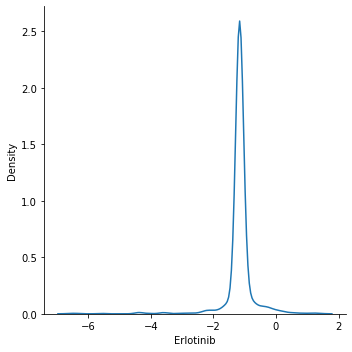

In [37]:
sns.displot(y, kind="kde")

In [ ]:
# So we can see that the target values have skewed distribution with a long initial tail


In [38]:
X = dataset[features]

In [39]:
X.head()

,exp_SLC4A1,exp_FAM214B,exp_CD79B,exp_MYLIP,exp_MED24,exp_CSDE1,exp_BAZ1B,exp_ABHD5,exp_MAP4K3,exp_ELOVL5,exp_POLR3B,exp_NPC1L1,exp_XYLT2,exp_RALBP1,exp_SAMD4A,exp_VIM,exp_AGPAT4,exp_PNPLA6,exp_TUBG2,exp_PARP3,exp_BARX2,exp_WDR37,exp_ARHGAP6,exp_LMO3,exp_DKK3,exp_NFE2L3,exp_NRIP2,exp_KCNQ1,exp_ARSF,exp_CALCRL,exp_ANKRD44,exp_SPEN,exp_CYB5R4,exp_PRKCQ,exp_CDK13,exp_METTL22,exp_ROCK1,exp_DNAJA2,exp_RNF126,exp_MNT,...,exp_ZNF418,exp_ATAD5,exp_ECM1,exp_AC079305.10,exp_MFGE8,exp_FERMT2,exp_CAMKV,exp_OR51E2,exp_SHISA6,exp_MTMR7,exp_PEAK1,exp_KRT33B,exp_GABRP,exp_SYT13,exp_UBQLN2,exp_FZD8,exp_RP11-422J8.1,exp_TRIP12,exp_DMRT1,exp_SLC4A11,exp_FGF23,exp_METTL25,exp_CDC73,exp_CD3EAP,exp_NCBP1,exp_WNT3,exp_RGS7BP,exp_AP000679.2,exp_CMTM5,exp_DAP3,exp_RAPH1,exp_CYB5B,exp_RHOV,exp_C17orf89,exp_PUF60,exp_C13orf45,exp_ZNF442,exp_RP11-403N16.3,exp_GTF2E1,exp_ZNF362
0,4.082593,6.298913,3.851031,7.107385,8.436494,11.343345,7.483741,7.551904,8.332643,11.792308,9.344713,4.248098,4.366640,7.451602,4.663437,7.258833,3.957589,7.600397,6.908966,4.725975,NaN,6.211135,5.629812,4.958598,3.485505,4.476219,4.079834,NaN,4.958131,3.983449,4.432377,8.632950,5.094334,4.029845,7.701648,7.631633,NaN,9.981774,7.670413,9.671062,...,5.914763,7.400583,4.981640,4.868796,NaN,8.584477,4.564852,4.174741,3.616413,3.510075,6.203490,4.443861,3.683258,4.143058,9.286393,6.062309,4.177499,9.914280,3.975643,6.627792,NaN,8.444246,9.201161,7.226234,7.368465,4.398275,3.338287,4.668934,4.596752,10.617282,6.767572,10.054453,4.593774,5.424791,10.172457,3.560752,3.714123,3.751627,9.030491,8.706857
1,4.128230,6.476800,3.649039,7.695474,NaN,10.441450,7.775860,NaN,8.897495,7.280994,9.235046,4.029988,4.606524,7.746412,4.777889,5.053373,4.928611,6.771384,NaN,5.982616,4.238520,6.693463,3.520891,4.414752,3.620253,4.059379,4.066404,5.788688,4.925361,4.072047,3.700446,8.786443,5.734335,4.144037,6.954582,7.508120,4.446643,9.794442,NaN,9.492787,...,4.466510,6.867038,8.489555,5.962027,4.355453,4.029825,4.392756,4.130343,NaN,3.459368,6.627770,4.228168,3.824430,4.057312,8.490557,4.263747,6.175023,10.459879,NaN,6.425510,3.702439,8.399821,8.850130,NaN,7.855743,4.582457,3.222617,4.623805,4.454426,11.317319,8.149260,11.047558,4.836936,5.226575,11.311974,3.958961,NaN,3.816234,NaN,7.600376
2,4.232633,5.409350,3.884663,5.997920,8.764779,11.155580,7.256661,7.720493,NaN,9.829221,8.406003,3.931312,4.951526,NaN,4.376442,13.615661,6.159889,8.130779,7.121475,5.203785,5.436578,5.574527,3.864687,4.232630,7.263396,8.851568,3.755380,NaN,5.182808,3.998052,3.903182,8.404504,5.257813,6.221232,6.727735,8.857687,5.802521,9.523043,8.570222,9.373495,...,5.720408,7.233137,5.714424,5.590182,4.976245,7.901070,4.308740,4.056972,3.671009,3.577847,7.010037,4.920441,3.847691,3.999551,9.010487,4.626338,5.975799,9.878371,3.882246,5.764312,4.142796,8.249753,7.617302,7.378636,NaN,5.155399,3.547933,NaN,NaN,11.469862,7.278961,8.799358,5.142446,6.427744,10.865098,3.803288,3.575255,3.737100,8.258913,NaN
3,4.274809,5.511578,3.822042,6.873338,8.765674,11.395225,8.001514,8.359996,8.441087,11.008791,8.806536,3.950303,5.199439,8.373395,5.403594,13.222709,4.974602,9.007124,7.337783,6.168544,NaN,6.411914,3.869755,3.858503,5.463546,5.144393,3.682765,4.861025,NaN,3.710644,4.179881,8.363210,5.683454,7.095368,7.322369,8.454900,5.933833,9.954870,8.703355,8.943933,...,4.888667,8.606337,5.370465,NaN,4.470538,10.056486,5.149470,4.144588,3.741141,NaN,7.364387,4.723452,3.771738,4.581364,9.269365,4.168433,4.561451,10.685752,3.771484,7.950414,4.496515,7.121637,7.924980,7.473654,8.310546,NaN,3.545479,NaN,4.632940,10.866240,6.724361,9.461169,4.427737,NaN,11.230596,4.301963,NaN,3.833572,8.968382,8.986759
4,4.138209,5.590375,3.775710,7.198329,7.990521,11.860634,7.673516,7.262398,NaN,11.156613,9.096359,3.890482,4.754753,8.025617,4.728453,5.072331,3.948612,8.237300,6.774186,6.215790,4.219273,NaN,3.924146,4.054676,5.758870,7.018634,3.985200,5.041176,4.933259,4.206833,3.763124,7.932391,5.462681,4.215227,7.903790,NaN,4.860129,9.945075,7.637739,9.476065,...,6.035

In [40]:
#Counting the total number of NaNs in each columns
NaN4Features = X.isnull().sum()

In [41]:
print(NaN4Features)

exp_SLC4A1           106
exp_FAM214B          106
exp_CD79B            106
exp_MYLIP            106
exp_MED24            106
                    ... 
exp_C13orf45         106
exp_ZNF442           106
exp_RP11-403N16.3    106
exp_GTF2E1           106
exp_ZNF362           106
Length: 1750, dtype: int64


In [ ]:
#This means that each of the feature columns have 106 /1061 = 10% as NaN values that should be imputed

In [42]:
#Total sum of NaN values in the dataset
X.isnull().values.sum()

185500

In [43]:
185500 / 1753 #Dividing the total number of NaNs by total number of features

105.81859669138619

In [ ]:
#This is the same number of NaNs per column variable as we calculated earlier

In [ ]:
#

In [44]:
#Now I am imputing the missing values by median although more sophisticated methods such as kNN or Bayesian imputation can also be used
X = X.fillna(X.median())

In [45]:
X.head()

,exp_SLC4A1,exp_FAM214B,exp_CD79B,exp_MYLIP,exp_MED24,exp_CSDE1,exp_BAZ1B,exp_ABHD5,exp_MAP4K3,exp_ELOVL5,exp_POLR3B,exp_NPC1L1,exp_XYLT2,exp_RALBP1,exp_SAMD4A,exp_VIM,exp_AGPAT4,exp_PNPLA6,exp_TUBG2,exp_PARP3,exp_BARX2,exp_WDR37,exp_ARHGAP6,exp_LMO3,exp_DKK3,exp_NFE2L3,exp_NRIP2,exp_KCNQ1,exp_ARSF,exp_CALCRL,exp_ANKRD44,exp_SPEN,exp_CYB5R4,exp_PRKCQ,exp_CDK13,exp_METTL22,exp_ROCK1,exp_DNAJA2,exp_RNF126,exp_MNT,...,exp_ZNF418,exp_ATAD5,exp_ECM1,exp_AC079305.10,exp_MFGE8,exp_FERMT2,exp_CAMKV,exp_OR51E2,exp_SHISA6,exp_MTMR7,exp_PEAK1,exp_KRT33B,exp_GABRP,exp_SYT13,exp_UBQLN2,exp_FZD8,exp_RP11-422J8.1,exp_TRIP12,exp_DMRT1,exp_SLC4A11,exp_FGF23,exp_METTL25,exp_CDC73,exp_CD3EAP,exp_NCBP1,exp_WNT3,exp_RGS7BP,exp_AP000679.2,exp_CMTM5,exp_DAP3,exp_RAPH1,exp_CYB5B,exp_RHOV,exp_C17orf89,exp_PUF60,exp_C13orf45,exp_ZNF442,exp_RP11-403N16.3,exp_GTF2E1,exp_ZNF362
0,4.082593,6.298913,3.851031,7.107385,8.436494,11.343345,7.483741,7.551904,8.332643,11.792308,9.344713,4.248098,4.366640,7.451602,4.663437,7.258833,3.957589,7.600397,6.908966,4.725975,4.243778,6.211135,5.629812,4.958598,3.485505,4.476219,4.079834,5.254675,4.958131,3.983449,4.432377,8.632950,5.094334,4.029845,7.701648,7.631633,5.564442,9.981774,7.670413,9.671062,...,5.914763,7.400583,4.981640,4.868796,4.899164,8.584477,4.564852,4.174741,3.616413,3.510075,6.203490,4.443861,3.683258,4.143058,9.286393,6.062309,4.177499,9.914280,3.975643,6.627792,4.221925,8.444246,9.201161,7.226234,7.368465,4.398275,3.338287,4.668934,4.596752,10.617282,6.767572,10.054453,4.593774,5.424791,10.172457,3.560752,3.714123,3.751627,9.030491,8.706857
1,4.128230,6.476800,3.649039,7.695474,8.003871,10.441450,7.775860,7.343903,8.897495,7.280994,9.235046,4.029988,4.606524,7.746412,4.777889,5.053373,4.928611,6.771384,7.175572,5.982616,4.238520,6.693463,3.520891,4.414752,3.620253,4.059379,4.066404,5.788688,4.925361,4.072047,3.700446,8.786443,5.734335,4.144037,6.954582,7.508120,4.446643,9.794442,7.793394,9.492787,...,4.466510,6.867038,8.489555,5.962027,4.355453,4.029825,4.392756,4.130343,3.837960,3.459368,6.627770,4.228168,3.824430,4.057312,8.490557,4.263747,6.175023,10.459879,3.834088,6.425510,3.702439,8.399821,8.850130,6.779702,7.855743,4.582457,3.222617,4.623805,4.454426,11.317319,8.149260,11.047558,4.836936,5.226575,11.311974,3.958961,3.673274,3.816234,8.968382,7.600376
2,4.232633,5.409350,3.884663,5.997920,8.764779,11.155580,7.256661,7.720493,8.461983,9.829221,8.406003,3.931312,4.951526,7.688652,4.376442,13.615661,6.159889,8.130779,7.121475,5.203785,5.436578,5.574527,3.864687,4.232630,7.263396,8.851568,3.755380,5.254675,5.182808,3.998052,3.903182,8.404504,5.257813,6.221232,6.727735,8.857687,5.802521,9.523043,8.570222,9.373495,...,5.720408,7.233137,5.714424,5.590182,4.976245,7.901070,4.308740,4.056972,3.671009,3.577847,7.010037,4.920441,3.847691,3.999551,9.010487,4.626338,5.975799,9.878371,3.882246,5.764312,4.142796,8.249753,7.617302,7.378636,7.487804,5.155399,3.547933,4.577764,4.283293,11.469862,7.278961,8.799358,5.142446,6.427744,10.865098,3.803288,3.575255,3.737100,8.258913,9.115738
3,4.274809,5.511578,3.822042,6.873338,8.765674,11.395225,8.001514,8.359996,8.441087,11.008791,8.806536,3.950303,5.199439,8.373395,5.403594,13.222709,4.974602,9.007124,7.337783,6.168544,4.243778,6.411914,3.869755,3.858503,5.463546,5.144393,3.682765,4.861025,4.931211,3.710644,4.179881,8.363210,5.683454,7.095368,7.322369,8.454900,5.933833,9.954870,8.703355,8.943933,...,4.888667,8.606337,5.370465,5.415715,4.470538,10.056486,5.149470,4.144588,3.741141,3.568489,7.364387,4.723452,3.771738,4.581364,9.269365,4.168433,4.561451,10.685752,3.771484,7.950414,4.496515,7.121637,7.924980,7.473654,8.310546,5.071425,3.545479,4.577764,4.632940,10.866240,6.724361,9.461169,4.427737,5.687422,11.230596,4.301963,3.673274,3.833572,8.968382,8.986759
4,4.138209,5.590375,3.775710,7.198329,7.990521,11.860634,7.673516,7.262398,8.461983,11.156613,9.096359,3.890482,4.754753,8.025617,4.728453,5.072331,3.948612,8.237300,6.774186,6.215790,4.219273,6.062071,3.924146,4.

In [46]:
#Now checking for NaN in target variable
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1056    False
1057    False
1058    False
1059    False
1060    False
Name: Erlotinib, Length: 1061, dtype: bool

In [ ]:
#So there is no NaN value in target

In [ ]:
#Now I split the predictors and target into train and test

In [47]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=3)

In [48]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

Now doing Dimensionality reduction

In [49]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)

In [ ]:
#Now lets look how much variance is covered by the first two components

In [50]:
pcaObj.explained_variance_ratio_

array([0.11188868, 0.07670741])

In [ ]:
#Clearly, using this method has lead to a very poor dimensionality reduction, given that the first two 
#components cover 11 + 7 = 18% variance only.

In [ ]:
#So now I use dimensionality reduction in order to preserve at least 95% of variance

In [51]:
pcaObj = PCA(n_components = 0.95)
pcaObj.fit(xTrain)
xTrainPCA95 = pcaObj.transform(xTrain)

In [52]:
pcaObj.explained_variance_ratio_

array([0.11188868, 0.07670741, 0.05086383, 0.02609216, 0.02242862,
       0.02138449, 0.01652894, 0.01555364, 0.01314234, 0.01279877,
       0.01181228, 0.01064214, 0.00989027, 0.00915089, 0.00887352,
       0.00783174, 0.00768579, 0.00729136, 0.00708237, 0.00693776,
       0.00663561, 0.00634075, 0.0060916 , 0.0058744 , 0.00567015,
       0.00544267, 0.00532408, 0.00526332, 0.00511192, 0.00504263,
       0.00486876, 0.00472777, 0.00469207, 0.0046224 , 0.00458566,
       0.00447221, 0.00436474, 0.00427001, 0.00411989, 0.0039927 ,
       0.00390861, 0.00385351, 0.0037373 , 0.00370558, 0.00365032,
       0.00355397, 0.00350133, 0.00346726, 0.00344778, 0.00337406,
       0.00330264, 0.00324812, 0.00317474, 0.0031477 , 0.00309579,
       0.00308937, 0.00301778, 0.00294072, 0.00292052, 0.00291347,
       0.00281075, 0.00277114, 0.00275776, 0.00272757, 0.00271236,
       0.00268757, 0.00262973, 0.00260179, 0.00259114, 0.00255936,
       0.00251126, 0.00246737, 0.00245041, 0.00241892, 0.00239

In [ ]:
#This also does not seem to be working given that in order to get 95% variance, there is hardly any reduction
#in dimension as we still have a lot of dimensions.

#Lets look at our data again

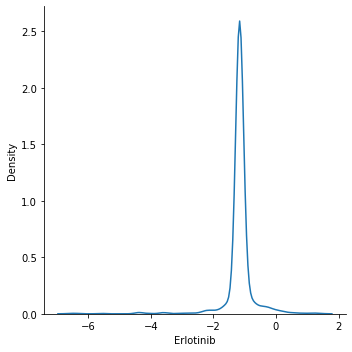

In [53]:
sns.displot(y, kind="kde")

In [61]:
# Clearly, there is no point in having those data points where the value of Erlotinib y value is less
#than -1.170 or more than -1.152. This is because we do not have adequate data points for those y values and it would be better if
# we discard those data values. This will also ensure that we have a more normal distribution. 


In [54]:
datasetGaussian = dataset[(dataset.Erlotinib>-1.170) & (dataset.Erlotinib < -1.152)]

In [55]:
datasetGaussian.shape

(795, 1751)

In [56]:
yGaussian = datasetGaussian.Erlotinib

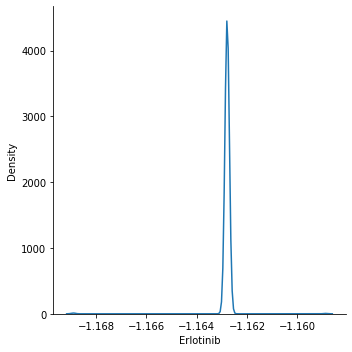

In [57]:
sns.displot(yGaussian, kind="kde")

In [ ]:
#Great, so we get rid of a lot of sparse data. 
#Now lets continue the procedure as earlier

In [58]:
yGaussian.describe()

count    795.000000
mean      -1.162804
std        0.000336
min       -1.168905
25%       -1.162793
50%       -1.162793
75%       -1.162793
max       -1.158880
Name: Erlotinib, dtype: float64

In [59]:
features = list(datasetGaussian.columns.values) #Make a list of all of the columns in the df. Here note we are using datasetGaussian
features.pop(features.index('Erlotinib'))
X = datasetGaussian[features]
NaN4Features = X.isnull().sum()
X.isnull().values.sum()

139035

In [60]:
X = X.fillna(X.median()) #Imputing by median

In [61]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, yGaussian, test_size=0.3, random_state=3)

In [62]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

In [63]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.11220645, 0.0775722 ])

In [ ]:
#We see that there is only a slight improvement in percentage variance captured i.e., its 18% now.

In [ ]:
#Lets see if I can further improve it, by normalizing yGaussian


In [64]:
meanY = np.mean(yGaussian)
stdY = np.std(yGaussian)

In [65]:
meanY

-1.1628035191381756

In [66]:
stdY

0.00033625323048055923

In [67]:
yNorm = (yGaussian-meanY)/stdY


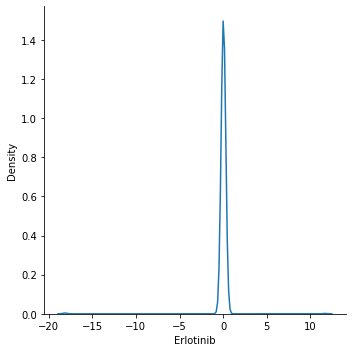

In [68]:
sns.displot(yNorm, kind="kde")

In [ ]:
#Lets Normalize X

In [69]:
meanX = np.mean(X)
stdX = np.std(X)

In [70]:
meanX.head()

exp_SLC4A1     4.317786
exp_FAM214B    5.993773
exp_CD79B      3.938895
exp_MYLIP      7.579860
exp_MED24      8.027403
dtype: float64

In [71]:
XNorm = (X-meanX)/stdX

In [72]:
XNorm = XNorm.fillna(X.median()) #Imputing by median

In [73]:
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yNorm, test_size=0.3, random_state=3)

In [74]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.06670886, 0.04557392])

In [ ]:
#This did not work either, as the cumulative variance percentage in fact got less.

In [75]:
#Lets try it with yGaussian, which has original y values. This will ensure that the model will predict the right
#values and not the normalized values
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yGaussian, test_size=0.3, random_state=3)

In [76]:
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.06670886, 0.04557392])

#Remarks: Despite using several strategies for dimensionality reduction, it does not seem to be working well, given that the combined variance of initial components looks to be very less despite all the strategies. 

For calculations ahead, I shall use the xTrain, xTest, yTrain and yTest as derived using yGaussian, as it will help me build a model that will give the true value of y (Erlotinib)

In [ ]:
#Lets try Polynomial Regression and then we will use ElasticNet

In [77]:
poly_features = PolynomialFeatures(degree=2, include_bias= False)

In [87]:
X_poly = poly_features.fit_transform(xTrain)

In [88]:
xTrain[0].shape

(1750,)

In [89]:
xTrain.shape

(556, 1750)

In [90]:
X_poly[0].shape

(1533875,)

In [91]:
X_poly.shape

(556, 1533875)

In [ ]:
#So we see that X_poly now has far more columns than xTrain which is a result of combination of all 2nd degree
# variables. Total attributes is equal to ( 1320 + 2 )! / (1320! 2!)

In [ ]:
#Now fitting a 

In [120]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly,yTrain)

This gave the error :Your session crashed after using all available RAM
Thus, I am abandoning polynomial fitting

In [ ]:
#If we had managed to do dimensionality reduction, then it would have made sense to carry out Polynomial fit.

In [78]:
#Lets start simple linear regression fit.
lin_reg = LinearRegression()

In [ ]:
#Lets first design a cross-validation set up as desired.
#For that I make use of GridSearch
#GridSearchCV should be used to find the optimal parameters to train your final model. 
#Typically, you should run GridSearchCV then look at the parameters that gave the model with the best score. 
#You should then take these parameters and train your final model on all of the data. It is important to 
#note that if you have trained your final model on all of your data, you cannot test it. For any correct test, 
#you must must reserve some of the data. That is why I am reserving the test data for the purpose.

In [79]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]} #Note that although I have done normalization, I am repeating it make a second normalization

In [80]:
grid_search = GridSearchCV(lin_reg, parameters, cv=5, scoring='r2', verbose=1, return_train_score=True)#Five fold cross validation




In [81]:
grid_search.fit(Xtrain, yTrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [83]:

print("Residual sum of squares: %.11f" % np.mean((grid_search.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00000013099


In [84]:
print('Best Score: ', grid_search.best_score_) #Gets the best R2 value score
print('Best Params: ', grid_search.best_params_) #Gets the parameter corresponding to it

Best Score:  -8.524749870579949e+23
Best Params:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [ ]:
#Here the R2 score is close to 0

In [85]:
#Now doing Linear Regression WITHOUT Grid Search cross validation
model = LinearRegression()
model.fit(Xtrain, yTrain)
#predictions = model.predict(XTest)
print("r2/variance : ", model.score(Xtest,yTest))
print("Residual sum of squares: %.11f" % np.mean((model.predict(Xtest) - yTest) ** 2))

r2/variance :  -1.0532866333761106
Residual sum of squares: 0.00000013099


In [ ]:
#Here the R2 score became  negative, and so the model is not as good as what we found by GridSearch

We see that R2 score is lowest for grid_search selected model. 


In [99]:
#The simple linear regression can also help us get the coefficients of each of the feature variables which we can plot

In [86]:
featureCoefficients = pd.DataFrame() 
featureCoefficients["Features"] = pd.DataFrame(Xtrain).columns
featureCoefficients['PredictedValues'] = pd.Series(model.coef_) 

print(featureCoefficients) 

               Features  PredictedValues
0            exp_SLC4A1        -0.000003
1           exp_FAM214B        -0.000008
2             exp_CD79B        -0.000018
3             exp_MYLIP         0.000005
4             exp_MED24         0.000005
...                 ...              ...
1745       exp_C13orf45        -0.000004
1746         exp_ZNF442        -0.000004
1747  exp_RP11-403N16.3        -0.000007
1748         exp_GTF2E1        -0.000002
1749         exp_ZNF362         0.000018

[1750 rows x 2 columns]


In [87]:
# find optimal alpha with grid search and Lasso Regression for regularization
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
lasso = Lasso()
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_) #Get best R2 score
print('Best Params: ', grid_result.best_params_) #Get the alpha parameter which corresponds to best results



Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  -9.176717099266369e+21
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.0s finished


In [88]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00000006527


We see that the residual sum of squares have dropped compared to previous models. However, there is no significant improvement in R2 score compared to the model we obtained using GridSearch with simple linear regression model. The n_jobs=-1 takes in all available cores.


In [91]:
#Now making models for ElasticNet
elastic_net = ElasticNet()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:   33.7s finished


Best Score:  -9.096557341419288e+21
Best Params:  {'alpha': 1000, 'l1_ratio': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.708258298016017e-05, tolerance: 7.4394629555326835e-09
  positive)


In [92]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00000006523


There is no improvement in residual sum of squared than lasso. So essentially either lasso model or elasticnet model can be used which has the lowest residual sum of squares.

In [93]:
#In order to get the coefficients of each of the predictors, we will now have 
#to build a model with the parameters as we obtained best by GridSearch

In [94]:
eNet = ElasticNet(alpha=1000, l1_ratio= 0) 


In [95]:
eNet.fit(Xtrain, yTrain) 
  


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.708258298016017e-05, tolerance: 7.4394629555326835e-09
  positive)


ElasticNet(alpha=1000, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
# calculate the prediction and mean square error 
yPred = eNet.predict(Xtest) 
print("Mean Squared Error:", np.mean((yPred - yTest)**2)) 
 

Mean Squared Error: 6.523261967069095e-08


In [97]:
#Now lets get the coefficients
eNetCoeff = pd.DataFrame() 
eNetCoeff["Features"] = Xtrain.columns 
eNetCoeff['PredictedCoefficients'] = pd.Series(eNet.coef_) 

In [98]:
eNetCoeff

,Features,PredictedCoefficients
0,exp_SLC4A1,-7.322785e-09
1,exp_FAM214B,1.403210e-08
2,exp_CD79B,-7.059350e-08
3,exp_MYLIP,4.548952e-09
4,exp_MED24,4.283788e-09
...,...,...
1745,exp_C13orf45,-5.131545e-09
1746,exp_ZNF442,-1.740092e-08
1747,exp_RP11-403N16.3,-5.000170e-09
1748,exp_GTF2E1,-1.417295e-08


In [99]:
pip install dtreeviz

     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 204.2MB 68kB/s 
     |████████████████████████████████| 204kB 41.6MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=30ed4ef1d732d8d790b01c131ec210c30919d544b0dcf02888d134ce050ba9f8
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612242 sha256=8edb7dde5f4fb2339db55da6d0284748444c7e2ac78388e7b7fa7ec231d1c084
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


**Now we use Random Forest in GRID Search for regression**

In [100]:
from sklearn import tree
from dtreeviz.trees import dtreeviz

In [101]:
param_grid = [
 {'n_estimators': [3, 10, 30,50,60,80,90], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [102]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [103]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',
return_train_score=True)

In [104]:
grid_search.fit(Xtrain, yTrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [105]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 3}

In [106]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [107]:
 cvres = grid_search.cv_results_

In [108]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(np.sqrt(-mean_score), params)
   

0.0003953492620283472 {'max_features': 2, 'n_estimators': 3}
0.00037405863061899916 {'max_features': 2, 'n_estimators': 10}
0.00036988370617829997 {'max_features': 2, 'n_estimators': 30}
0.00036855447380604073 {'max_features': 2, 'n_estimators': 50}
0.0003678627490282888 {'max_features': 2, 'n_estimators': 60}
0.000367703351688978 {'max_features': 2, 'n_estimators': 80}
0.00036746212017291273 {'max_features': 2, 'n_estimators': 90}
0.00039542958557972835 {'max_features': 4, 'n_estimators': 3}
0.0003750016138039886 {'max_features': 4, 'n_estimators': 10}
0.00037283404452670156 {'max_features': 4, 'n_estimators': 30}
0.00036959992647296895 {'max_features': 4, 'n_estimators': 50}
0.0003679892212721392 {'max_features': 4, 'n_estimators': 60}
0.0003682706503682437 {'max_features': 4, 'n_estimators': 80}
0.0003672252037212619 {'max_features': 4, 'n_estimators': 90}
0.00036549332459050995 {'max_features': 6, 'n_estimators': 3}
0.00039001657685714417 {'max_features': 6, 'n_estimators': 10}
0.0

In [109]:
#We note that the RMSE for Training data is lowest of value 0.00036549332459050995 for {'max_features': 6, 'n_estimators': 3}

In [110]:
# calculate the prediction and mean square error for Test data 
yPred = grid_search.predict(Xtest) 
print("Mean Squared Error:", np.mean((yPred - yTest)**2))

Mean Squared Error: 8.18486830243069e-08


In [111]:
#We note that the mean squared error is also as low as I was getting with Lasso or Ridge Regression earlier or Elastic net

In [116]:
#Now making the tree with the best parameters obtained by random forest
forest_reg = RandomForestRegressor(max_features = 6, n_estimators = 3)

In [117]:
forest_reg.fit(Xtrain, yTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
def plotRandomForestR(model, X, Y):
    selected_genes = Xtrain.columns # get the feature names
    model.fit(X, Y)
    plt.figure(figsize=(20,20))
    _ = tree.plot_tree(model.estimators_[0], feature_names=selected_genes, filled=True)

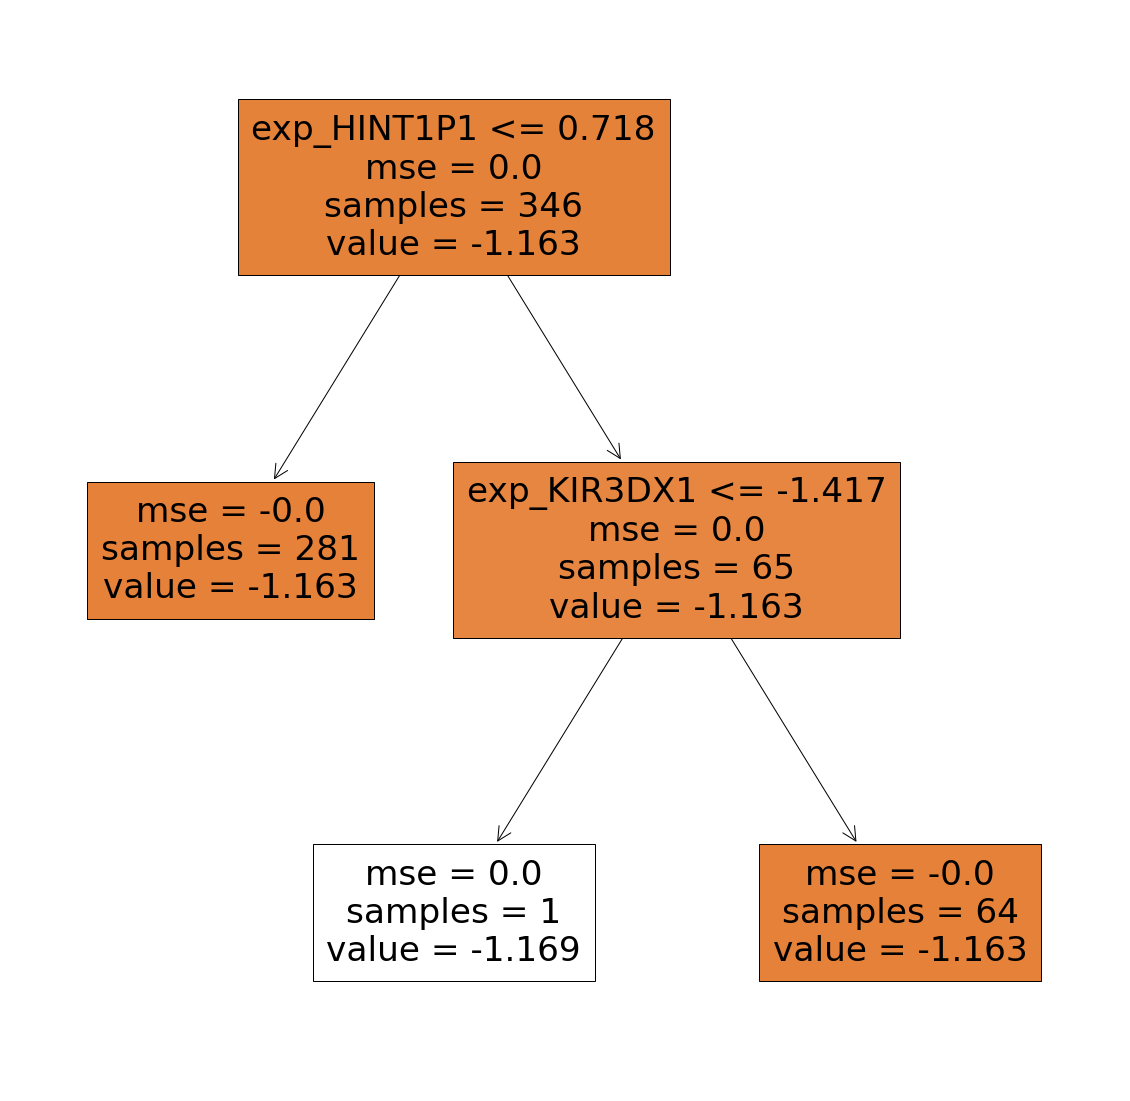

In [119]:
plotRandomForestR(forest_reg,Xtrain,yTrain)